In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
data = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
test_score = data[["math score","reading score","writing score"]]
test_score.head(2)

,math score,reading score,writing score
0,72,72,74
1,69,90,88


<AxesSubplot:>

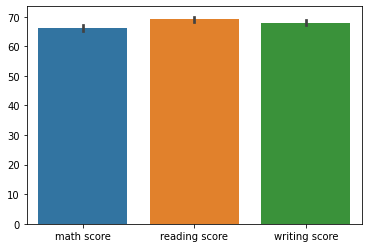

In [7]:
sns.barplot(data=test_score)

In [8]:
data["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [9]:
lunch= pd.get_dummies(data["lunch"])

In [10]:
data["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
data["parental level of education"] = labelEncoder.fit_transform(data["parental level of education"])
data["gender"] = labelEncoder.fit_transform(data["gender"])
data["race/ethnicity"] = labelEncoder.fit_transform(data["race/ethnicity"])
data["test preparation course"] = labelEncoder.fit_transform(data["test preparation course"])

In [12]:
data.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,standard,1,72,72,74
1,0,2,4,standard,0,69,90,88
2,0,1,3,standard,1,90,95,93


In [13]:
pd.concat([data,lunch],axis=1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,free/reduced,standard
0,0,1,1,standard,1,72,72,74,0,1
1,0,2,4,standard,0,69,90,88,0,1
2,0,1,3,standard,1,90,95,93,0,1
3,1,0,0,free/reduced,1,47,57,44,1,0
4,1,2,4,standard,1,76,78,75,0,1
...,...,...,...,...,...,...,...,...,...,...
995,0,4,3,standard,0,88,99,95,0,1
996,1,2,2,free/reduced,1,62,55,55,1,0
997,0,2,2,free/reduced,0,59,71,65,1,0
998,0,3,4,standard,0,68,78,77,0,1


In [14]:
data.drop("lunch",axis=1,inplace=True)

<AxesSubplot:>

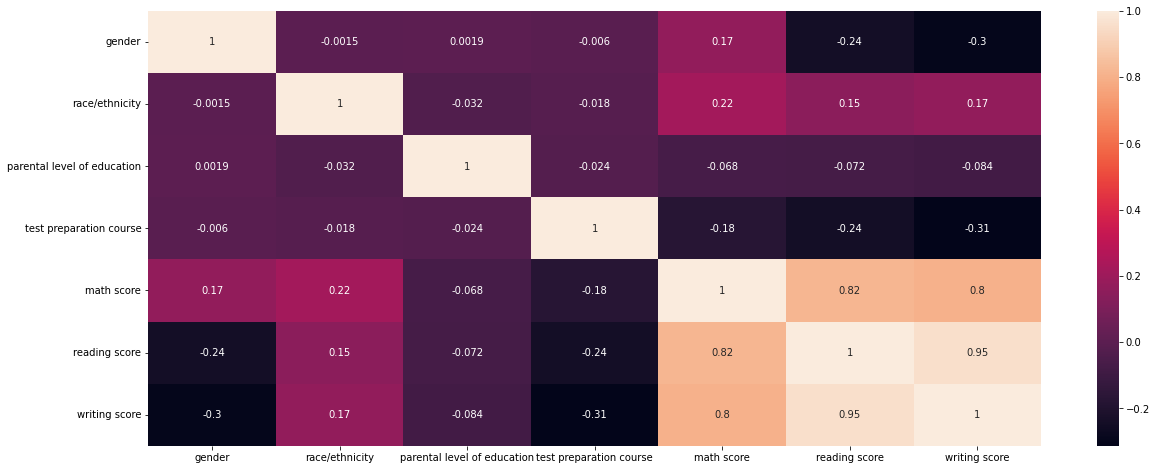

In [15]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)

In [16]:
x = data.drop(test_score,axis=1)
y = test_score

In [17]:
print(x.shape)
print(y.shape)

(1000, 4)
(1000, 3)


In [18]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
print(X.shape, y.shape)

(1000, 10) (1000,)


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test =  train_test_split(X,y,random_state=1)
# x_train,x_test, y_train,y_test =  train_test_split(x,y,random_state=1)

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.7013333333333334

In [21]:
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [22]:
score = []
error = []
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred != y_test))
    score.append(knn.score(x_train,y_train))
    print("K value : ", k ,"Train Score ", knn.score(x_train,y_train) , "Test Score",knn.score(x_test,y_test))

K value :  1 Train Score  1.0 Test Score 0.812
K value :  2 Train Score  0.904 Test Score 0.812
K value :  3 Train Score  0.9253333333333333 Test Score 0.84
K value :  4 Train Score  0.8866666666666667 Test Score 0.844
K value :  5 Train Score  0.9053333333333333 Test Score 0.86
K value :  6 Train Score  0.8853333333333333 Test Score 0.848
K value :  7 Train Score  0.8973333333333333 Test Score 0.864
K value :  8 Train Score  0.8773333333333333 Test Score 0.852
K value :  9 Train Score  0.8986666666666666 Test Score 0.848
K value :  10 Train Score  0.892 Test Score 0.852


Text(0, 0.5, 'Error Rate')

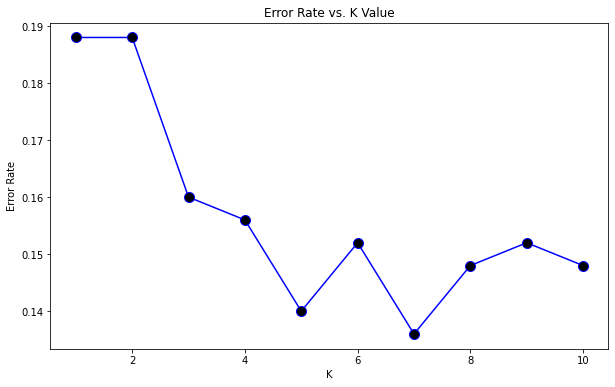

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error,color = 'blue', marker='o',markerfacecolor='black', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        83
           1       0.88      0.85      0.86        74
           2       0.89      0.80      0.84        93

    accuracy                           0.84       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.84      0.84       250



In [25]:
data.head(1)

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,0,1,1,1,72,72,74


In [26]:
print(x_test[:1])

[[ 0.42899985 -0.70220585 -1.04944805  1.00355721 -0.90091704  0.45523399
  -1.56829774  0.94687119 -1.75750933 -0.66636339]]


In [27]:
knn.predict([[0,1,1,1,7,2,0,2,0,4]])

array([2])

In [28]:
pred

array([1, 2, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 0,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 2, 2, 0,
       2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2,
       0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0,
       1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2,
       1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1,
       2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 1, 2, 2, 2, 0, 2,
       2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 1, 0,
       1, 2, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0,
       0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 2,
       0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2,
       1, 1, 0, 2, 0, 0, 2, 0])